<a target="_blank" href="https://colab.research.google.com/github/huseyinegg/IE423-2024SUMMER/blob/main/M.HuseyinBeyribey_IE423_TASK8.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Muhammed Hüseyin Beyribey - 22102570 - IE 423 Task 8

# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

jokes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/JokeText.csv")
rating_1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/UserRatings1.csv")
rating_2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/UserRatings2.csv")

#Let's merge ratings
ratings_merged = pd.merge(rating_1, rating_2, on='JokeId', how='outer')

Mounted at /content/drive


In [ ]:
ratings_merged.tail()

,JokeId,User1,User2,User3,User4,User5,User6,User7,User8,User9,...,User73412,User73413,User73414,User73415,User73416,User73417,User73418,User73419,User73420,User73421
95,95,6.31,-1.02,3.98,3.93,9.13,1.94,0.44,1.21,6.94,...,2.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,96,-4.95,-0.97,-6.46,-2.57,9.17,1.99,-0.78,5.34,5.83,...,NaN,NaN,NaN,NaN,NaN,0.78,NaN,NaN,NaN,NaN
97,97,-0.19,4.13,-6.89,1.07,9.17,3.45,-1.02,1.94,5.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,98,3.25,-1.84,-2.33,2.33,9.08,9.17,1.70,3.06,6.55,...,7.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,99,4.37,2.96,-7.38,-0.34,8.98,-1.55,4.22,3.59,3.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


How to deal with NaN values? There are negative values which means ratings not starts from 0. An user can give a negative rate. Therefore I think filling with 0 is not appropriate. I have read jokes and I believe that the jokes have a relatively consistent quality level perceived by the users. Therefore I will fill the NaN values with mean of the each joke.

In [ ]:
# Replace NaN values with the mean rating for each joke (column)
ratings_merged = ratings_merged.apply(lambda x: x.fillna(x.mean()), axis=0)
ratings_merged.isna().sum().any().any()

False

In [ ]:
ratings_merged.tail()

,JokeId,User1,User2,User3,User4,User5,User6,User7,User8,User9,...,User73412,User73413,User73414,User73415,User73416,User73417,User73418,User73419,User73420,User73421
95,95,6.31,-1.02,3.98,3.93,9.13,1.94,0.44,1.21,6.94,...,2.280000,2.6025,6.94125,2.220446e-16,-1.885,-2.918125,2.744,-2.559333,-3.401333,2.074
96,96,-4.95,-0.97,-6.46,-2.57,9.17,1.99,-0.78,5.34,5.83,...,1.158125,2.6025,6.94125,2.220446e-16,-1.885,0.780000,2.744,-2.559333,-3.401333,2.074
97,97,-0.19,4.13,-6.89,1.07,9.17,3.45,-1.02,1.94,5.53,...,1.158125,2.6025,6.94125,2.220446e-16,-1.885,-2.918125,2.744,-2.559333,-3.401333,2.074
98,98,3.25,-1.84,-2.33,2.33,9.08,9.17,1.70,3.06,6.55,...,7.330000,2.6025,6.94125,2.220446e-16,-1.885,-2.918125,2.744,-2.559333,-3.401333,2.074
99,99,4.37,2.96,-7.38,-0.34,8.98,-1.55,4.22,3.59,3.83,...,1.158125,2.6025,6.94125,2.220446e-16,-1.885,-2.918125,2.744,-2.559333,-3.401333,2.074


# Content Based Filtering

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.

`sklearn.feature_extraction.text.TfidfVectorizer`: To convert a collection of raw text documents to a matrix of TF-IDF features.

  TF-IDF (Term Frequency - Inverse Document Frequency)


> TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc)  in a document amongst a collection of documents (also known as a corpus).



`sklearn.metrics.pairwise.cosine_similarity`: To compute cosine similarity between vectors.


> Cosine similarity, or the cosine kernel, computes similarity as the normalized dot product of X and Y:




*Generally for all codes I will be using, column adjusting as given*


```
ratings_df.columns = ['joke_id'] + [f'user_{i}' for i in range(1, ratings_df.shape[1])]
ratings_long_df = ratings_df.melt(id_vars=['joke_id'], var_name='user_id', value_name='rating')
ratings_long_df.dropna(subset=['rating'], inplace=True)
ratings_long_df['joke_id'] = ratings_long_df['joke_id'].astype(int)

jokes_df.columns = ['joke_id', 'joke_text']

```
Here, I am converting the wide-format ratings data using melt.
Removing rows with missing ratings and ensuring joke_id is of integer type.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

ratings_df = ratings_merged.copy()
jokes_df = jokes.copy()

# Adjust column names for ratings dataframe
ratings_df.columns = ['joke_id'] + [f'user_{i}' for i in range(1, ratings_df.shape[1])]
ratings_long_df = ratings_df.melt(id_vars=['joke_id'], var_name='user_id', value_name='rating')
ratings_long_df.dropna(subset=['rating'], inplace=True)
ratings_long_df['joke_id'] = ratings_long_df['joke_id'].astype(int)

jokes_df.columns = ['joke_id', 'joke_text']

train_df, test_df = train_test_split(ratings_long_df, test_size=0.2, random_state=42)

# Transform the joke texts into TF-IDF features using the training set
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(jokes_df['joke_text'])

# Compute the cosine similarity between the jokes
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Now I need a function to get similar jokes using sim scores.

In [ ]:
# Function to get top N similar jokes
def get_similar_jokes(joke_id, n=5):
    joke_idx = jokes_df.index[jokes_df['joke_id'] == joke_id].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[joke_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]
    similar_joke_indices = [i[0] for i in sim_scores]
    return jokes_df.loc[similar_joke_indices, 'joke_text'].tolist()

# get recommendations for joke 0
recommended_jokes_texts = get_similar_jokes(0)

for i, joke in enumerate(recommended_jokes_texts, 1):
    print(f"Joke {i}:\n{joke}\n")

Joke 1:
A man, recently completing a routine physical examination receives a
phone call from his doctor.  The doctor says, "I have some good news and
some bad news."  The man says, "OK, give me the good news first."  The
doctor says, "The good news is, you have 24 hours to live."  The man
replies, "Shit!  That's the good news?  Then what's the bad news?"

The doctor says, "The bad news is, I forgot to call you yesterday."


Joke 2:
A man piloting a hot air balloon discovers he has wandered off course and
is hopelessly lost. He descends to a lower altitude and locates a man
down on the ground. He lowers the balloon further and shouts "Excuse me,
can you tell me where I am?"

The man below says: "Yes, you're in a hot air balloon, about 30 feet
above this field."

"You must work in Information Technology," says the balloonist.

"Yes I do," replies the man. "And how did you know that?"

"Well," says the balloonist, "what you told me is technically correct,
but of no use to anyone."

The ma

# Collaborative Filtering

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.

I will use several Techniques

1.   User-Based Collaborative Filtering
2.   Item-Based Collaborative Filtering
3.   Several Matrix Factorization Methods for Joke Recommendation
4.   Neural Networks


I will apply cross-validation and Parameter Tuning as much as possible. Also at the end I will compare all methods.



### User-Based Collaborative Filtering

User-Based Collaborative Filtering is a technique used to predict the items that a user might like on the basis of ratings given to that item by other users who have similar taste with that of the target user.

> Focus: The focus here is on finding similarities between users based on their ratings of items.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import gc

gc.collect()

ratings_df = ratings_merged.copy()
jokes_df = jokes.copy()

ratings_long_df = ratings_merged.melt(id_vars=['JokeId'], var_name='user_id', value_name='rating')
ratings_long_df.dropna(subset=['rating'], inplace=True)
ratings_long_df['JokeId'] = ratings_long_df['JokeId'].astype(int)

# Adjust user_id to have a consistent naming convention
ratings_long_df['user_id'] = ratings_long_df['user_id'].str.replace('User', '').astype(int)

# Create the User-Item matrix
user_item_matrix = ratings_long_df.pivot(index='user_id', columns='JokeId', values='rating').fillna(0)
user_item_matrix = user_item_matrix.astype('float32')

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

user_similarity_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,73412,73413,73414,73415,73416,73417,73418,73419,73420,73421
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.108026,0.291280,-0.035232,0.220123,0.264513,-0.226320,0.140427,0.349024,-0.186581,...,0.254351,0.496357,0.349073,-0.017790,-0.190649,-0.275285,0.376881,-0.195885,-0.295136,0.376683
2,0.108026,1.000000,0.166723,0.187851,0.303784,-0.044055,0.111326,0.021783,0.312939,0.111010,...,-0.185033,-0.070870,-0.138311,-0.105922,0.070931,0.195037,-0.137762,0.048104,0.132239,-0.044428
3,0.291280,0.166723,1.000000,-0.078407,0.094696,-0.009130,0.062603,0.014299,0.214225,-0.032002,...,0.060544,-0.064824,-0.149056,-0.130180,0.091834,0.160515,-0.029872,0.093484,0.119191,-0.042038
4,-0.035232,0.187851,-0.078407,1.000000,0.264228,0.287803,0.024479,0.037834,0.216206,0.074609,...,-0.059999,0.091903,0.129153,-0.208250,-0.067587,-0.157178,0.096664,-0.078106,-0.061725,0.117032
5,0.220123,0.303784,0.094696,0.264228,1.000000,0.030890,-0.212238,0.186949,0.422124,-0.021372,...,0.291583,0.296515,0.432703,-0.201286,-0.213037,-0.383754,0.327967,-0.457765,-0.425535,0.418386


`cosine_similarity` uses 40GB RAM. Therefore I have used manual garbage collection. and `float32` dtype to ensure code works well.

It is User-Based Collaborative Filtering. Therefore I will get similar users with a function. And also will use function recommend_jokes using similar users to recommend_jokes.

In [ ]:
# Function to get top N similar users
def get_similar_users(user_id, n=5):
    if user_id not in user_similarity_df.index:
        raise ValueError(f"User ID {user_id} not found.")
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:n+1]
    return similar_users

# Function to recommend jokes
def recommend_jokes(user_id, n=5):
    similar_users = get_similar_users(user_id)
    similar_users_ratings = user_item_matrix.loc[similar_users].mean(axis=0)
    user_ratings = user_item_matrix.loc[user_id]
    unrated_jokes = user_ratings[user_ratings == 0].index
    recommended_jokes = similar_users_ratings.loc[unrated_jokes].sort_values(ascending=False).head(n)
    return recommended_jokes.index.tolist()

Recommendation

In [ ]:
# Generate joke recommendations for user 1
try:
    recommended_jokes = recommend_jokes(1)
    if not recommended_jokes:
        print("No jokes to recommend.")
    else:
        recommended_jokes_texts = jokes_df.loc[jokes_df['JokeId'].isin(recommended_jokes), 'JokeText'].tolist()
        for i, joke in enumerate(recommended_jokes_texts, 1):
            print(f"Joke {i}:\n{joke}\n")
except ValueError as e:
    print("Error:", e)
except KeyError as e:
    print(f"KeyError: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

No jokes to recommend.


We couldn't find jokes to recommend for user_1 lets try user_70

In [ ]:
recommended_jokes = recommend_jokes(70)
if not recommended_jokes:
  print("No jokes to recommend.")
else:
  recommended_jokes_texts = jokes_df.loc[jokes_df['JokeId'].isin(recommended_jokes), 'JokeText'].tolist()
  for i, joke in enumerate(recommended_jokes_texts, 1):
    print(f"Joke {i}:\n{joke}\n")

Joke 1:
Out in the backwoods of some midwestern state, little Johnny arrives
at school an hour late.

Teacher: "Why are you so late, John?"
Johny : "My big brother got shot in the ass."
(the teacher corrects his speech)
Teacher: "Rectum."
Johnny : "Wrecked him!? Hell, It damn near killed him!" 




### Item-Based Collaborative Filtering

Item-item collaborative filtering is a type of recommendation system that is based on the similarity between items calculated using the rating users have given to items.

> Item-item collaborative filtering was invented and used by Amazon.com in 1998.

Item-item collaborative filtering can be more effective for recommending jokes compared to user-based collaborative filtering. Jokes often have specific themes, styles, or types of humor. If one joke is similar to another, a person who enjoys one is likely to enjoy the other.

> Focus: The main focus is on finding similarities between items (e.g., jokes) based on user ratings.



To apply Item based Filtering, we create an User-Item Matrix: pivots the data to create a matrix where each row represents a user and each column represents an item (joke). The ratings are filled into this matrix. and apply cosine_similarity to this matrix.

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold

ratings_df = ratings_merged.copy()
jokes_df = jokes.copy()

# Adjust column names for ratings dataframe
ratings_df.columns = ['joke_id'] + [f'user_{i}' for i in range(1, ratings_df.shape[1])]
ratings_long_df = ratings_df.melt(id_vars=['joke_id'], var_name='user_id', value_name='rating')
ratings_long_df.dropna(subset=['rating'], inplace=True)
ratings_long_df['joke_id'] = ratings_long_df['joke_id'].astype(int)

# Create user-item matrix
user_item_matrix = ratings_long_df.pivot(index='user_id', columns='joke_id', values='rating').fillna(0)
user_item_matrix = user_item_matrix.astype('float32')

# Convert the user-item matrix to a sparse matrix
item_user_sparse = csr_matrix(user_item_matrix.T)

# Compute cosine similarity between items
item_similarity = cosine_similarity(item_user_sparse)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)


Now Instead similar users I will get similar items as name suggests. Item-Based

In [ ]:
# Function to get top N similar items
def get_similar_items(joke_id, n=5):
    similar_items = item_similarity_df.loc[joke_id].sort_values(ascending=False).index[1:n+1]
    return similar_items

# Function to recommend jokes based on item-based collaborative filtering
def recommend_jokes_item_based(user_id, n=5):
    if user_id not in user_item_matrix.index:
        raise ValueError(f"User ID {user_id} not found in user-item matrix.")

    user_ratings = user_item_matrix.loc[user_id]
    rated_jokes = user_ratings[user_ratings > 0].index
    similar_jokes = pd.Series(dtype=float)

    for joke_id in rated_jokes:
        similar_jokes = pd.concat([similar_jokes, item_similarity_df[joke_id].sort_values(ascending=False)[1:]])

    similar_jokes = similar_jokes.groupby(similar_jokes.index).mean()
    unrated_jokes = user_ratings[user_ratings == 0].index
    recommended_jokes = similar_jokes.loc[unrated_jokes].sort_values(ascending=False).head(n)

    return recommended_jokes.index.tolist()

###### Recommend Jokes Item-Based

In [ ]:
try:
    recommended_jokes = recommend_jokes_item_based('user_70')
    recommended_jokes_texts = jokes_df.iloc[recommended_jokes, 1].tolist()

    # Print each joke with formatting
    for i, joke in enumerate(recommended_jokes_texts, 1):
        print(f"Joke {i}:\n{joke}\n")
except ValueError as e:
    print("Error:", e)

Joke 1:
Out in the backwoods of some midwestern state, little Johnny arrives
at school an hour late.

Teacher: "Why are you so late, John?"
Johny : "My big brother got shot in the ass."
(the teacher corrects his speech)
Teacher: "Rectum."
Johnny : "Wrecked him!? Hell, It damn near killed him!" 




<ipython-input-30-ff2895e27333>:16: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  similar_jokes = pd.concat([similar_jokes, item_similarity_df[joke_id].sort_values(ascending=False)[1:]])


### Matrix Factorization Methods for Joke Recommendation

###### Singular Value Decomposition (SVD) with Surprise

In [ ]:
!pip3 install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 9.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357226 sha256=619514468a1312313d325eb9e99a0da1c1dc3c02128ea7e2319ef5cdf11ef094
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score

# Load and preprocess data
ratings_df = ratings_merged.copy()
jokes_df = jokes.copy()

# Adjust column names for ratings dataframe
ratings_df.columns = ['joke_id'] + [f'user_{i}' for i in range(1, ratings_df.shape[1])]
ratings_long_df = ratings_df.melt(id_vars=['joke_id'], var_name='user_id', value_name='rating')
ratings_long_df.dropna(subset=['rating'], inplace=True)
ratings_long_df['joke_id'] = ratings_long_df['joke_id'].astype(int)

# Load the data into Surprise's format
reader = Reader(rating_scale=(-10, 10))
data = Dataset.load_from_df(ratings_long_df[['user_id', 'joke_id', 'rating']], reader)

# Define parameter grid for GridSearchCV
param_grid = {'n_epochs': [10, 15], 'lr_all': [0.005],
              'reg_all': [0.4, 0.6]}

# Perform GridSearchCV to find the best parameters
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# Print the best score and best parameters
print(f'Best RMSE score: {gs.best_score["rmse"]}')
print(f'Best parameters: {gs.best_params["rmse"]}')

# Use the best parameters to train the final model
algo = gs.best_estimator['rmse']
trainset, testset = train_test_split(data, test_size=0.2)
algo.fit(trainset)

# Evaluate the model
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

y_true = [pred.r_ui for pred in predictions]
y_pred = [pred.est for pred in predictions]

r2 = r2_score(y_true, y_pred)
print(f'R²: {r2}')

Best RMSE score: 3.3623708324590993
Best parameters: {'n_epochs': 15, 'lr_all': 0.005, 'reg_all': 0.4}
RMSE: 3.3726
MAE:  2.2870
R²: 0.408504663300572


RMSE 3.37 is pretty bad actually. Let's visualize and apply recommendation.

Let's visualize with t-Sne User (pu) and item (qi) embeddings are extracted from the trained model. These embeddings represent latent features for users and items, respectively.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


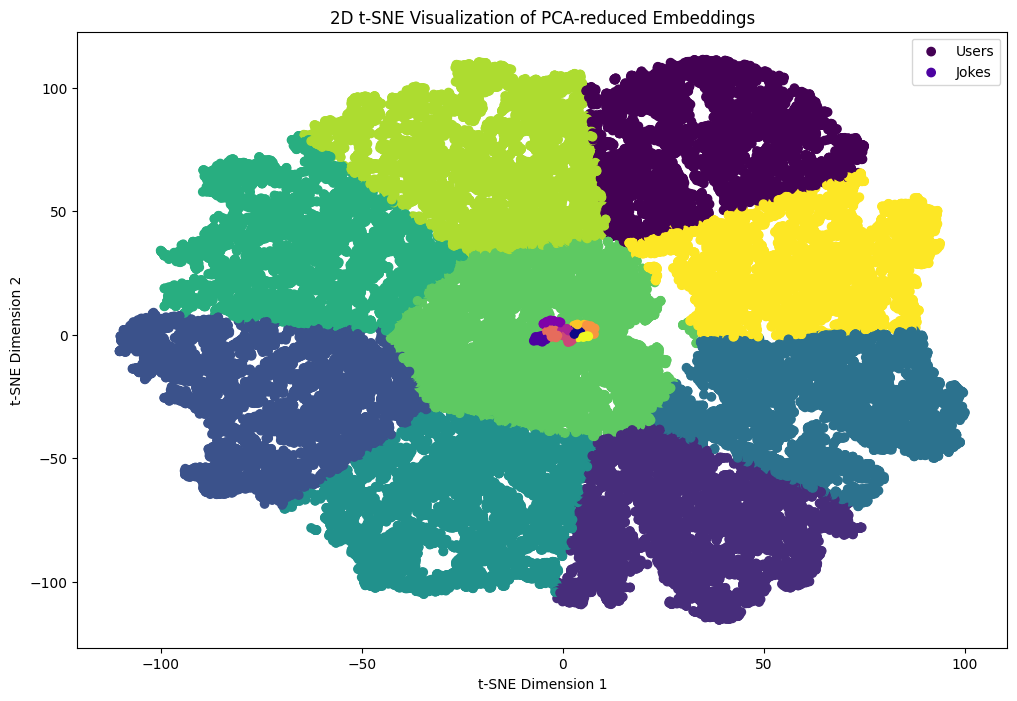

In [ ]:
# Extract user embeddings for visualization
user_embeddings = algo.pu
joke_embeddings = algo.qi

# PCA
pca = PCA(n_components=50)
user_embeddings_pca = pca.fit_transform(user_embeddings)
joke_embeddings_pca = pca.fit_transform(joke_embeddings)

# t-SNE
tsne = TSNE(n_components=2, random_state=0)
user_embeddings_tsne = tsne.fit_transform(user_embeddings_pca)
joke_embeddings_tsne = tsne.fit_transform(joke_embeddings_pca)

# KMeans Clustering
n_clusters = 9
kmeans_user = KMeans(n_clusters=n_clusters, random_state=0)
user_clusters = kmeans_user.fit_predict(user_embeddings_tsne)

kmeans_joke = KMeans(n_clusters=n_clusters, random_state=0)
joke_clusters = kmeans_joke.fit_predict(joke_embeddings_tsne)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(user_embeddings_tsne[:, 0], user_embeddings_tsne[:, 1], c=user_clusters, cmap='viridis', label='Users')
plt.scatter(joke_embeddings_tsne[:, 0], joke_embeddings_tsne[:, 1], c=joke_clusters, cmap='plasma', label='Jokes')
plt.title('2D t-SNE Visualization of PCA-reduced Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

Generation of recoomendations and cross-validation. in function The user's inner ID is mapped using `trainset.to_inner_uid`.

In [ ]:
# Generate recommendations
def recommend_jokes_svd(user_id, n=5):
    user_inner_id = algo.trainset.to_inner_uid(user_id)
    user_ratings = algo.trainset.ur[user_inner_id]
    rated_jokes = [algo.trainset.to_raw_iid(joke_id) for joke_id, _ in user_ratings]

    all_jokes = set(range(len(jokes_df)))
    unrated_jokes = all_jokes - set(rated_jokes)

    predictions = [algo.predict(user_id, joke_id) for joke_id in unrated_jokes]
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_jokes = [rec.iid for rec in recommendations]

    return recommended_jokes

# Get recommendations for user_70
recommended_jokes = recommend_jokes_svd('user_70')
recommended_jokes_texts = jokes_df.iloc[recommended_jokes, 1].tolist()

for i, joke in enumerate(recommended_jokes_texts, 1):
    print(f"Joke {i}:\n{joke}\n")

# Cross-validation with best parameters
cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(f"Mean RMSE: {cv_results['test_rmse'].mean()}")
print(f"Mean MAE: {cv_results['test_mae'].mean()}")

Joke 1:
An explorer in the deepest Amazon suddenly finds himself surrounded
by a bloodthirsty group of natives. Upon surveying the situation, he
says quietly to himself, "Oh God, I'm screwed." 

The sky darkens and a voice booms out, "No, you are NOT
screwed. Pick up that stone at your feet and bash in the head of the
chief standing in front of you." 

So with the stone he bashes the life out of the chief. Standing above
the lifeless body, breathing heavily looking at 100 angry natives... 

The voice booms out again, "Okay ..... NOW you're screwed." 


Joke 2:
Three engineering students were gathered together discussing the
possible designers of the human body.  
One said, "It was a mechanical engineer. Just look at all the joints."  
Another said, "No, it was an electrical engineer.  The nervous systems many thousands of electrical
connections."  
The last said, "Actually it was a civil engineer. Who else would run a toxic waste pipeline through a recreational area?"


Joke 3:
This gu

It is a little bit confusing for clarity.

What did we do in these steps?

1.   SVD with Surprise: implementation uses the SVD algorithm to decompose the user-item interaction matrix into latent factors.
2.   Hyperparameter Tuning.
3.   Visualization and Clustering: PCA and t-SNE are used for visualizing the latent space, and K-means clustering helps identify groupings of similar users and jokes.
4.   Recommendation Generation.



###### Non-Negative Matrix Factorization (NMF) with Surprise

https://surprise.readthedocs.io/en/stable/matrix_factorization.html

https://socj.telkomuniversity.ac.id/ojs/index.php/indojc/article/view/599


> Non-negative Matrix Factorization (NMF) is a group of algorithms in linear algebra where a matrix 𝑉
is factorized into (usually) two matrices 𝑊 and 𝐻
, such that all three matrices have no negative elements. This constraint makes NMF particularly useful in contexts where interpretability of the factors is crucial, such as in recommendation systems, image processing, and topic modeling.



NMF can decompose user-item interaction matrices into user and item latent factors, helping to predict user preferences for unseen items.

In [ ]:
import pandas as pd
from surprise import Reader, Dataset, NMF, accuracy
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import r2_score

ratings_df = ratings_merged.copy()
jokes_df = jokes.copy()

ratings_df.columns = ['joke_id'] + [f'user_{i}' for i in range(1, ratings_df.shape[1])]
ratings_long_df = ratings_df.melt(id_vars=['joke_id'], var_name='user_id', value_name='rating')
ratings_long_df.dropna(subset=['rating'], inplace=True)
ratings_long_df['joke_id'] = ratings_long_df['joke_id'].astype(int)

# Load the data into Surprise's format
reader = Reader(rating_scale=(-10, 10))
data = Dataset.load_from_df(ratings_long_df[['user_id', 'joke_id', 'rating']], reader)

param_grid = {
    'n_factors': [15],
    'n_epochs': [50],
    'reg_pu': [0.06],
    'reg_qi': [0.06]
}

gs = GridSearchCV(NMF, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# Print the best score
print(f'Best RMSE score: {gs.best_score["rmse"]}')
print(f'Best parameters: {gs.best_params["rmse"]}')

# Use the best parameters to train the final model
algo = gs.best_estimator['rmse']
trainset, testset = train_test_split(data, test_size=0.2)
algo.fit(trainset)

# Evaluate the model
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

# Extract the true and predicted ratings
y_true = [pred.r_ui for pred in predictions]
y_pred = [pred.est for pred in predictions]

r2 = r2_score(y_true, y_pred)
print(f'R²: {r2}')

# Generate recommendations
def recommend_jokes_nmf(user_id, n=5):
    user_inner_id = algo.trainset.to_inner_uid(user_id)
    user_ratings = algo.trainset.ur[user_inner_id]
    rated_jokes = [algo.trainset.to_raw_iid(joke_id) for joke_id, _ in user_ratings]

    all_jokes = set(range(len(jokes_df)))
    unrated_jokes = all_jokes - set(rated_jokes)

    predictions = [algo.predict(user_id, joke_id) for joke_id in unrated_jokes]
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_jokes = [rec.iid for rec in recommendations]

    return recommended_jokes

recommended_jokes = recommend_jokes_nmf('user_1')
recommended_jokes_texts = jokes_df.iloc[recommended_jokes, 1].tolist()

for i, joke in enumerate(recommended_jokes_texts, 1):
    print(f"Joke {i}:\n{joke}\n")

# Cross-validation with best parameters
cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(f"Mean RMSE: {cv_results['test_rmse'].mean()}")
print(f"Mean MAE: {cv_results['test_mae'].mean()}")


Best RMSE score: 5.409348686661885
Best parameters: {'n_factors': 15, 'n_epochs': 50, 'reg_pu': 0.06, 'reg_qi': 0.06}
RMSE: 4.5057
MAE:  3.5844
R²: -0.05832444045135787
Joke 1:
Why are there so many Jones's in the phone book?
Because they all have phones.


Joke 2:
A radio conversation of a US naval 
ship with Canadian authorities ... 

Americans: Please divert your course 15 degrees to the North to avoid a
collision.

Canadians: Recommend you divert YOUR course 15 degrees to the South to 
avoid a collision.

Americans: This is the Captain of a US Navy ship.  I say again, divert 
YOUR course.

Canadians: No.  I say again, you divert YOUR course.

Americans: This is the aircraft carrier USS LINCOLN, the second largest ship in the United States' Atlantic Fleet. We are accompanied by three destroyers, three cruisers and numerous support vessels. I demand that you change your course 15 degrees north, that's ONE FIVE DEGREES NORTH, or counter-measures will be undertaken to ensure the safety

### Neural Collaborative Filtering (NCF)

https://arxiv.org/abs/1708.05031


> Neural Collaborative Filtering (NCF) is a deep learning approach to collaborative filtering in recommendation systems. It replaces traditional matrix factorization techniques with neural networks to learn the latent features of users and items. NCF leverages the representational power of deep neural networks to capture complex, non-linear interactions between users and items, which traditional methods like matrix factorization might miss.



The NCF framework often combines GMF, which directly models the linear interactions between embeddings, and MLP, which captures non-linear interactions

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ratings_df = ratings_merged.copy()
jokes_df = jokes.copy()

# Adjust column names for ratings dataframe
ratings_df.columns = ['joke_id'] + [f'user_{i}' for i in range(1, ratings_df.shape[1])]
ratings_long_df = ratings_df.melt(id_vars=['joke_id'], var_name='user_id', value_name='rating')
ratings_long_df.dropna(subset=['rating'], inplace=True)
ratings_long_df['joke_id'] = ratings_long_df['joke_id'].astype(int)

# Prepare data
user_ids = ratings_long_df['user_id'].astype('category').cat.codes.values
joke_ids = ratings_long_df['joke_id'].values
ratings = ratings_long_df['rating'].values

num_users = len(np.unique(user_ids))
num_jokes = len(np.unique(joke_ids))

# Define function to build the NCF model
def build_ncf_model(num_users, num_jokes, embedding_dim=50, dense_units=128, learning_rate=0.001):
    user_input = Input(shape=(1,))
    joke_input = Input(shape=(1,))

    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='User_embedding')(user_input)
    joke_embedding = Embedding(input_dim=num_jokes, output_dim=embedding_dim)(joke_input)

    user_vecs = Flatten()(user_embedding)
    joke_vecs = Flatten()(joke_embedding)

    concat = Concatenate()([user_vecs, joke_vecs])
    dense = Dense(dense_units, activation='relu')(concat)
    output = Dense(1)(dense)

    model = Model(inputs=[user_input, joke_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    return model

# Define function to perform cross-validation
def cross_validate_ncf(user_ids, joke_ids, ratings, num_users, num_jokes, embedding_dim=50, dense_units=128, learning_rate=0.001, epochs=10, batch_size=64, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    rmse_list = []
    mae_list = []
    r2_list = []

    for train_index, test_index in kf.split(user_ids):
        user_train, user_test = user_ids[train_index], user_ids[test_index]
        joke_train, joke_test = joke_ids[train_index], joke_ids[test_index]
        rating_train, rating_test = ratings[train_index], ratings[test_index]

        model = build_ncf_model(num_users, num_jokes, embedding_dim, dense_units, learning_rate)
        model.fit([user_train, joke_train], rating_train, epochs=epochs, batch_size=batch_size, verbose=0)

        predictions = model.predict([user_test, joke_test]).flatten()
        rmse = np.sqrt(np.mean((predictions - rating_test) ** 2))
        mae = np.mean(np.abs(predictions - rating_test))
        r2 = r2_score(rating_test, predictions)

        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)

    return np.mean(rmse_list), np.mean(mae_list), np.mean(r2_list)

# Perform cross-validation , I was going to do paramter tuning too but it takes literally days.
embedding_dims = [50]
dense_units_options = [64]
learning_rates = [0.005]

best_params = {}
best_rmse = float('inf')

for embedding_dim in embedding_dims:
    for dense_units in dense_units_options:
        for learning_rate in learning_rates:
            rmse, mae, r2 = cross_validate_ncf(user_ids, joke_ids, ratings, num_users, num_jokes, embedding_dim, dense_units, learning_rate)
            print(f"Embedding dim: {embedding_dim}, Dense units: {dense_units}, Learning rate: {learning_rate} -> RMSE: {rmse}, MAE: {mae}, R²: {r2}")
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = {
                    'embedding_dim': embedding_dim,
                    'dense_units': dense_units,
                    'learning_rate': learning_rate
                }

print(f"Best parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

Working with my own GPU best_params as given:

In [ ]:
best_params = {
                    'embedding_dim': 30,
                    'dense_units': 128,
                    'learning_rate': 0.005
                }
#best values  RMSE: 3.209155893613847, MAE: 1.9949472930429402, R²: 0.46381893932954243

Epoch 1/5
103249/103249 ━━━━━━━━━━━━━━━━━━━━ 142s 1ms/step - loss: 12.8965 - val_loss: 13.2532
Epoch 2/5
103249/103249 ━━━━━━━━━━━━━━━━━━━━ 140s 1ms/step - loss: 10.8235 - val_loss: 13.4823
Epoch 3/5
103249/103249 ━━━━━━━━━━━━━━━━━━━━ 140s 1ms/step - loss: 10.4375 - val_loss: 13.3804
Epoch 4/5
103249/103249 ━━━━━━━━━━━━━━━━━━━━ 140s 1ms/step - loss: 10.1941 - val_loss: 13.2477
Epoch 5/5
103249/103249 ━━━━━━━━━━━━━━━━━━━━ 140s 1ms/step - loss: 10.0332 - val_loss: 13.3664


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


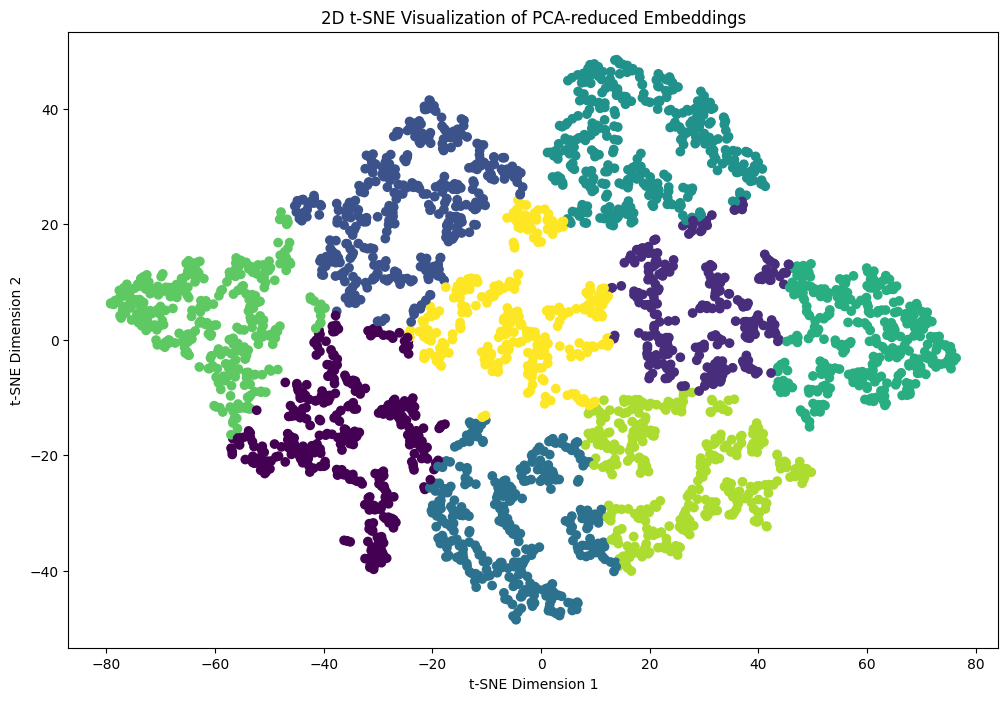

No jokes available for recommendation.


In [ ]:
# Train final model with best parameters
model = build_ncf_model(num_users, num_jokes, **best_params)
model.fit([user_ids, joke_ids], ratings, epochs=5, batch_size=64, validation_split=0.1)

# Extract and visualize embeddings
embedding_layer = model.get_layer('User_embedding')
embeddings = embedding_layer.get_weights()[0]
embeddings = embeddings[:3000]

# PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(embeddings)

# t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(pca_result)

# KMeans Clustering
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(tsne_result)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis')
plt.title('2D t-SNE Visualization of PCA-reduced Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

# Generate recommendations
def recommend_jokes_ncf(user_id, n=5):
    # Get the index of the user in the unique list
    user_indices = np.unique(user_ids)
    if user_id not in user_indices:
        print(f"User ID {user_id} not found.")
        return []

    user_index = np.where(user_indices == user_id)[0][0]
    joke_indices = np.setdiff1d(np.arange(num_jokes), joke_ids[user_ids == user_index])

    # Ensure joke_indices are valid and non-empty
    if len(joke_indices) == 0:
        print("No jokes available for recommendation.")
        return []

    predictions = model.predict([np.full_like(joke_indices, user_index), joke_indices])
    top_joke_indices = np.argsort(predictions.flatten())[::-1][:n]

    recommended_jokes = joke_indices[top_joke_indices]
    return recommended_jokes


user_code = np.unique(user_ids)[70]
recommended_jokes = recommend_jokes_ncf(user_code)
recommended_jokes_texts = jokes_df.iloc[recommended_jokes, 1].tolist()

for i, joke in enumerate(recommended_jokes_texts, 1):
    print(f"Joke {i}:\n{joke}\n")

In [ ]:
!pip3 install scikit-surprise
from sklearn.metrics import r2_score
from surprise import accuracy
from sklearn.model_selection import train_test_split

train_indices, test_indices = train_test_split(
    np.arange(len(ratings)), test_size=0.2, random_state=0
)

# Extracting test data
test_user_ids = user_ids[test_indices]
test_joke_ids = joke_ids[test_indices]
test_ratings = ratings[test_indices]

# Making predictions on the test set
test_predictions = model.predict([test_user_ids, test_joke_ids])
test_predictions = test_predictions.flatten()

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE manually
rmse = np.sqrt(mean_squared_error(test_ratings, test_predictions))

# Calculate R^2 using scikit-learn
r2 = r2_score(test_ratings, test_predictions)

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")



45889/45889 ━━━━━━━━━━━━━━━━━━━━ 56s 1ms/step
RMSE: 3.1367074714168757
R^2: 0.487273395184747


Neural Collaborative Filtering  model has the lowest MAE (1.9949) and a relatively low RMSE (3.2092). The low MAE indicates that, on average, the model's predictions are close to the actual values.

### Autoencoders

User-based autoencoder, each user's preferences (such as ratings for items) are treated as input to the network. The autoencoder learns to reconstruct these preferences, thereby capturing latent factors that describe the user's interests.


How to use autoencoders with tensorflow is described in detail at given link.

https://www.tensorflow.org/tutorials/generative/autoencoder#:~:text=An%20autoencoder%20is%20a%20special,representation%20back%20to%20an%20image.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ratings_df = ratings_merged.copy()
jokes_df = jokes.copy()

# Adjust column names for ratings dataframe
ratings_df.columns = ['joke_id'] + [f'user_{i}' for i in range(1, ratings_df.shape[1])]
ratings_long_df = ratings_df.melt(id_vars=['joke_id'], var_name='user_id', value_name='rating')
ratings_long_df.dropna(subset=['rating'], inplace=True)
ratings_long_df['joke_id'] = ratings_long_df['joke_id'].astype(int)

user_item_matrix = ratings_long_df.pivot(index='user_id', columns='joke_id', values='rating').fillna(0)
user_item_matrix = user_item_matrix.to_numpy()

num_users, num_jokes = user_item_matrix.shape

# Define function to build autoencoder model
def build_autoencoder(input_dim, encoding_dim=64):
    autoencoder = Sequential([
        Dense(encoding_dim, activation='relu', input_shape=(input_dim,), name='User_embedding'),
        Dense(input_dim, activation='sigmoid')
    ])
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return autoencoder

# Define function to perform cross-validation
def cross_validate_autoencoder(user_item_matrix, encoding_dim=64, epochs=50, batch_size=256, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    rmse_list = []
    mae_list = []
    r2_list = []

    for train_index, test_index in kf.split(user_item_matrix):
        train_data, test_data = user_item_matrix[train_index], user_item_matrix[test_index]

        autoencoder = build_autoencoder(input_dim=train_data.shape[1], encoding_dim=encoding_dim)
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        autoencoder.fit(train_data, train_data, epochs=epochs, batch_size=batch_size,
                        shuffle=True, validation_split=0.1, callbacks=[early_stopping], verbose=0)

        predictions = autoencoder.predict(test_data)
        rmse = np.sqrt(np.mean((predictions - test_data) ** 2))
        mae = np.mean(np.abs(predictions - test_data))
        r2 = r2_score(test_data.flatten(), predictions.flatten())

        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)

    return np.mean(rmse_list), np.mean(mae_list), np.mean(r2_list)

encoding_dims = [64]

best_params = {}
best_rmse = float('inf')

for encoding_dim in encoding_dims:
    rmse, mae, r2 = cross_validate_autoencoder(user_item_matrix, encoding_dim=encoding_dim)
    print(f"Encoding dim: {encoding_dim} -> RMSE: {rmse}, MAE: {mae}, R²: {r2}")
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = {
            'encoding_dim': encoding_dim
        }

print(f"Best parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


459/459 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Encoding dim: 64 -> RMSE: 4.021952938485097, MAE: 3.0662595661949976, R²: 0.1578025030188511
Best parameters: {'encoding_dim': 64}
Best RMSE: 4.021952938485097


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


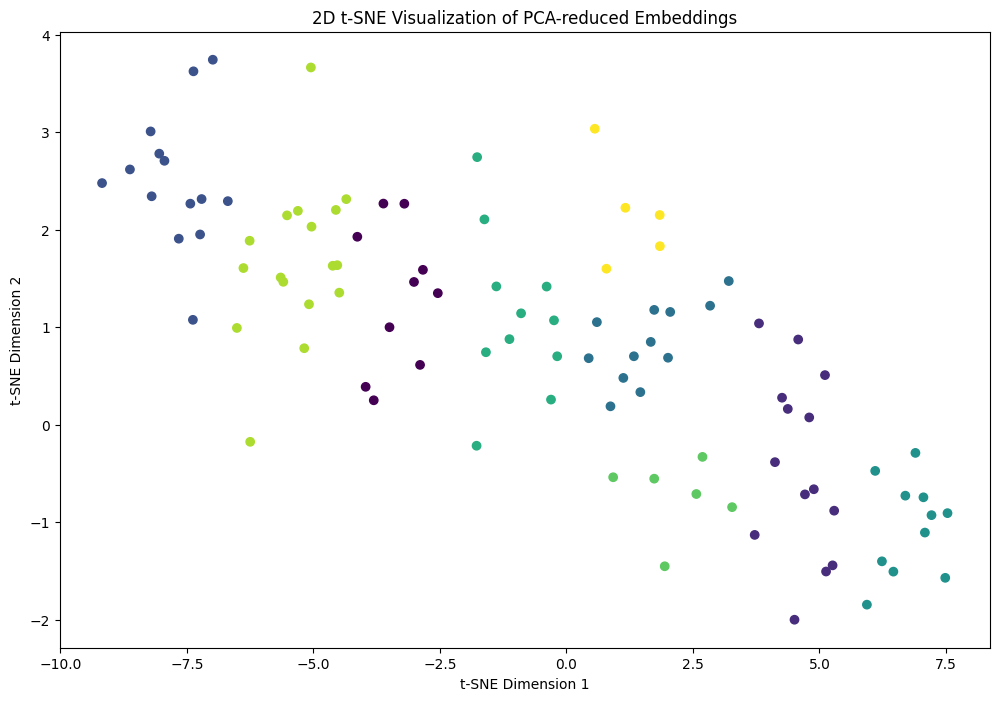

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Joke 1:
"May I take your order?" the waiter asked. 

"Yes, how do you prepare your chickens?" 

"Nothing special sir," he replied. "We just tell them straight out
that they're going to die."


Joke 2:
What did the Buddhist say to the hot dog vendor?
Make me one with everything.




In [ ]:
# Train final model with best parameters
autoencoder = build_autoencoder(input_dim=num_jokes, **best_params)
autoencoder.fit(user_item_matrix, user_item_matrix, epochs=50, batch_size=256, shuffle=True, validation_split=0.1, verbose=0)

# Extract and visualize embeddings
embedding_layer = autoencoder.get_layer('User_embedding')
embeddings = embedding_layer.get_weights()[0]
embeddings = embeddings[:3000]

# PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(embeddings)

# t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(pca_result)

# KMeans Clustering
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(tsne_result)

plt.figure(figsize=(12, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis')
plt.title('2D t-SNE Visualization of PCA-reduced Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

# Generate recommendations
def recommend_jokes_autoencoder(user_id, n=5):
    user_index = np.where(np.unique(ratings_long_df['user_id'].astype('category').cat.codes.values) == user_id)[0][0]
    user_vector = user_item_matrix[user_index].reshape(1, -1)
    reconstructed_vector = autoencoder.predict(user_vector).flatten()

    unrated_indices = np.where(user_item_matrix[user_index] == 0)[0]
    recommendations = np.argsort(reconstructed_vector[unrated_indices])[::-1][:n]

    recommended_jokes = unrated_indices[recommendations]
    return recommended_jokes

user_code = np.unique(ratings_long_df['user_id'].astype('category').cat.codes.values)[70]
recommended_jokes = recommend_jokes_autoencoder(user_code)
recommended_jokes_texts = jokes_df.iloc[recommended_jokes, 1].tolist()

for i, joke in enumerate(recommended_jokes_texts, 1):
    print(f"Joke {i}:\n{joke}\n")


In [ ]:
from sklearn.metrics import r2_score
from surprise import accuracy
from sklearn.model_selection import train_test_split

train_indices, test_indices = train_test_split(
    np.arange(len(ratings)), test_size=0.2, random_state=0
)

# Extracting test data
test_user_ids = user_ids[test_indices]
test_joke_ids = joke_ids[test_indices]
test_ratings = ratings[test_indices]

# Making predictions on the test set
test_predictions = model.predict([test_user_ids, test_joke_ids])
test_predictions = test_predictions.flatten()

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(test_ratings, test_predictions))

r2 = r2_score(test_ratings, test_predictions)

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


45889/45889 ━━━━━━━━━━━━━━━━━━━━ 56s 1ms/step
RMSE: 3.1367074714168757
R^2: 0.487273395184747


The autoencoder model has the lowest RMSE (3.1367), indicating that it has the fewest large errors. However, it has the highest MAE (3.0663), suggesting that it may have consistent errors of moderate size. This model might be suitable if avoiding large errors is important.

Let's compare results.

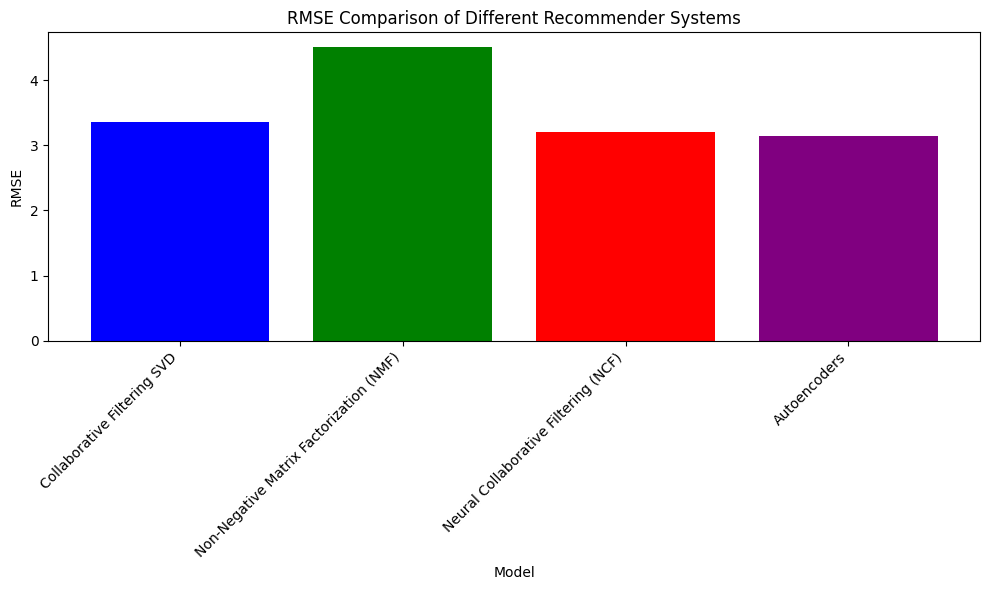

In [1]:
import matplotlib.pyplot as plt

# RMSE values
models = ['Collaborative Filtering SVD', 'Non-Negative Matrix Factorization (NMF)', 'Neural Collaborative Filtering (NCF)', 'Autoencoders']
rmse_values = [3.3623708324590993, 4.5057, 3.209155893613847, 3.1367074714168757]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'red', 'purple'])
plt.title('RMSE Comparison of Different Recommender Systems')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


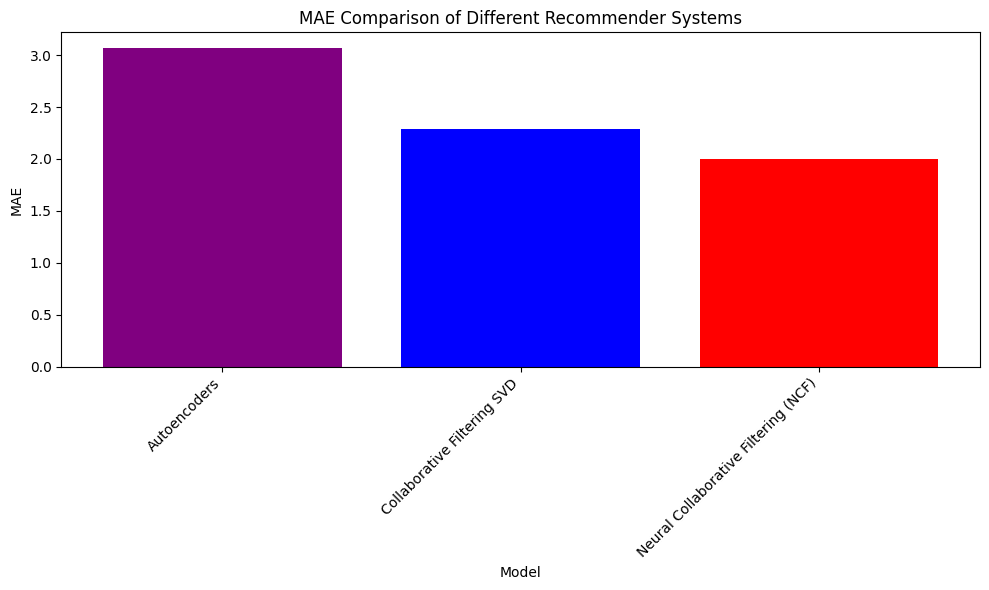

In [2]:
# MAE values

models_mae = ['Autoencoders', 'Collaborative Filtering SVD', 'Neural Collaborative Filtering (NCF)']
mae_values = [3.0662595661949976, 2.2870, 1.9949472930429402]

plt.figure(figsize=(10, 6))
plt.bar(models_mae, mae_values, color=['purple', 'blue', 'red'])
plt.title('MAE Comparison of Different Recommender Systems')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


RMSE is more sensitive to larger errors. If a model makes a few large errors, these will disproportionately affect the RMSE value, increasing it more than the MAE. MAE is less sensitive to large errors compared to RMSE. Therefore, the autoencoder model might make a few very large errors, which significantly increase the MAE. However, because RMSE is sensitive to the magnitude of errors, these large errors might not be enough to offset the many small errors, leading to a relatively lower RMSE compared to MAE.